#### Here we will discover some of the utilities of the module called 'fiona' 

In [14]:
import fiona
import geopandas as gpd
import rasterio, rasterio.mask

In [15]:
#so now let's read the shapefile features with fiona :
link_shp = r"data\Geojson & shapefile Pokhara boundaries\pokhara.shp"
with fiona.open(link_shp, 'r')as shapefile:
    for feature in shapefile :
        shapes = [feature['geometry']]

#so now let's read the raster file with rasterio :
raster_link = r'data\Raster\nepal_land_cover.tif'
world_raster = r'data\Raster\NE1_50M_SR_W.tif'
with rasterio.open(world_raster) as src, rasterio.open(raster_link) as world:
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
    out_meta = src.meta

out_meta.update({"driver": "GTiff", "height": out_image.shape[1], "width": out_image.shape[2], "transform" : out_transform,})

# so now let's write the new raster that represent our shapefile mask on the raster :
with rasterio.open("data\output raster\out_pokhara_mask.tif", "w", **out_meta) as dest:
    dest.write(out_image)

Let's vizualize the final image:

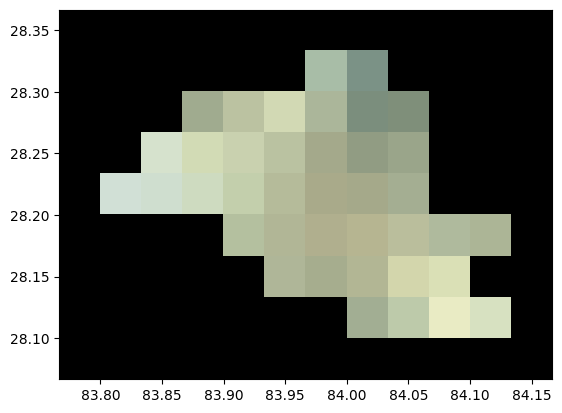

<Axes: >

In [17]:
from rasterio.plot import show
show(rasterio.open("data\output raster\out_pokhara_mask.tif"))